In [ ]:
## Task 1: Dataset Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load a dataset

data = pd.read_csv('/content/sample_data/insurance.csv')
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X = data['bmi'].values.reshape(-1, 1)
Y = data['charges'].values
print("Dataset loaded with", len(X), "data points.")

Dataset loaded with 1338 data points.


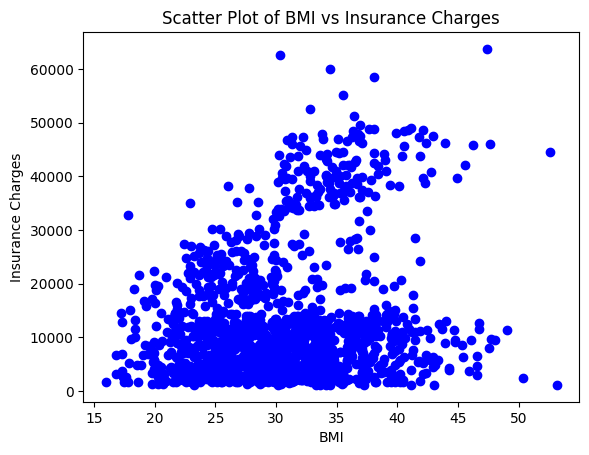

In [ ]:
## Task 2: Data Visualization
plt.scatter(X, Y, color='blue')
plt.title("Scatter Plot of BMI vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.show()

In [ ]:

## Task 3: Linear Regression Implementation

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (m): {slope}")
print(f"Intercept (c): {intercept}")


Slope (m): 393.87303079739524
Intercept (c): 1192.9372089611497


In [ ]:
## Task 4: Coefficient of Determination (R²)
r_squared = model.score(X, Y)
print(f"R²: {r_squared}")



R²: 0.03933913991786264


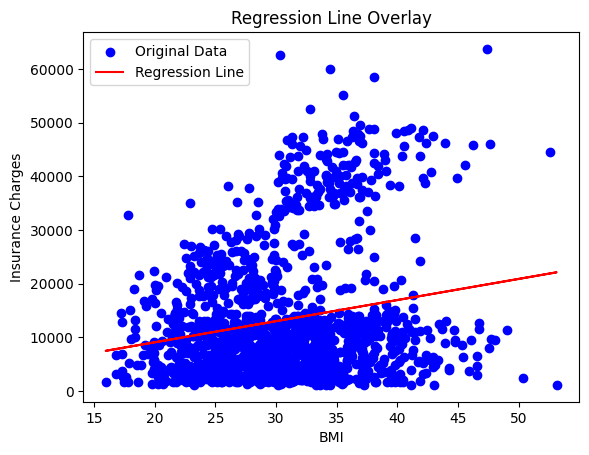

In [ ]:
## Task 5: Predictions and Visualization
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title("Regression Line Overlay")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()


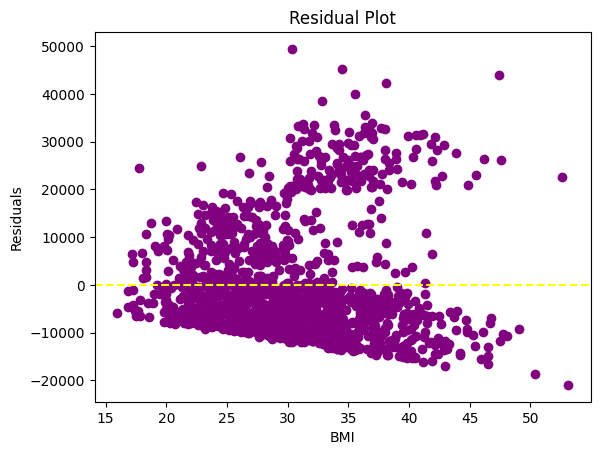

In [ ]:

## Task 6: Residual Analysis
residuals = Y - Y_pred

plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='yellow', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("BMI")
plt.ylabel("Residuals")
plt.show()

In [ ]:

## Task 7: Model Evaluation
mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 9172.351145507564
Mean Squared Error (MSE): 140777900.09850758
Root Mean Squared Error (RMSE): 11864.986308399499


In [ ]:
##task of gradient descent


In [ ]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = data['bmi']
y = data['charges']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [ ]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)

    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 13270.42, 2401.91


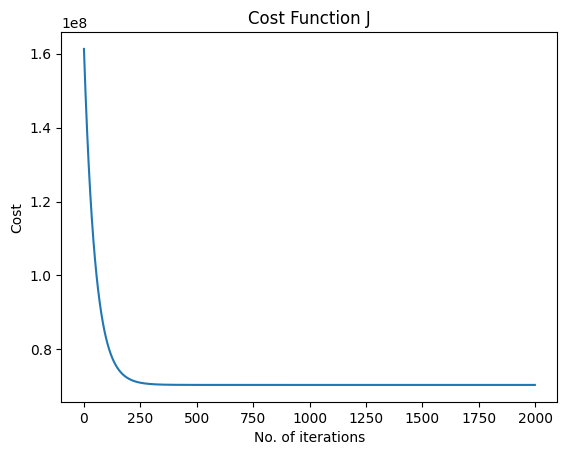

In [ ]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
#Animation
import matplotlib.animation as animation


#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)


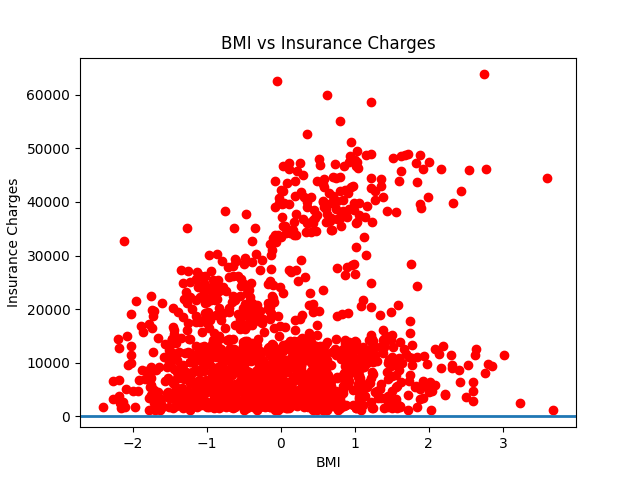

In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))